<a href="https://colab.research.google.com/github/printAsmamaw/BreastCancer_Detection/blob/main/MangoDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
from os import listdir
import tensorflow as tf
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,InputLayer,Flatten, Dropout, Dense,Activation


In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE =8
EPOCHS = 20
CHANNELS=3
LR = 1e-4


In [ ]:
import os

folder_path = '/content/drive/MyDrive/mango leaves'
if os.path.exists(folder_path):
    print(f"The directory '{folder_path}' exists.")
else:
    print(f"The directory '{folder_path}' does not exist.")


The directory '/content/drive/MyDrive/mango leaves' exists.


In [ ]:
Image_Generator = ImageDataGenerator( horizontal_flip=True, rotation_range=10,
rescale=1.0/255, shear_range=0.2, zoom_range=0.3,
fill_mode="reflect"
)


In [ ]:
train_generator=Image_Generator.flow_from_directory( '/content/drive/MyDrive/mango/train', target_size=(IMAGE_SIZE,IMAGE_SIZE), batch_size=BATCH_SIZE,
class_mode='sparse', color_mode="rgb", shuffle=True, seed=123
)


Found 2169 images belonging to 5 classes.


In [ ]:
val_datagen=ImageDataGenerator( rescale=1.0/255,
)
val_generator=val_datagen.flow_from_directory( '/content/drive/MyDrive/mango/val', target_size=(IMAGE_SIZE,IMAGE_SIZE), batch_size=BATCH_SIZE,
color_mode="rgb", class_mode="sparse", shuffle=True, seed=123
)
# /content/drive/MyDrive/mango/train


Found 350 images belonging to 5 classes.


In [ ]:
class_names = ['Anthracnose', 'Bacterial Canker', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


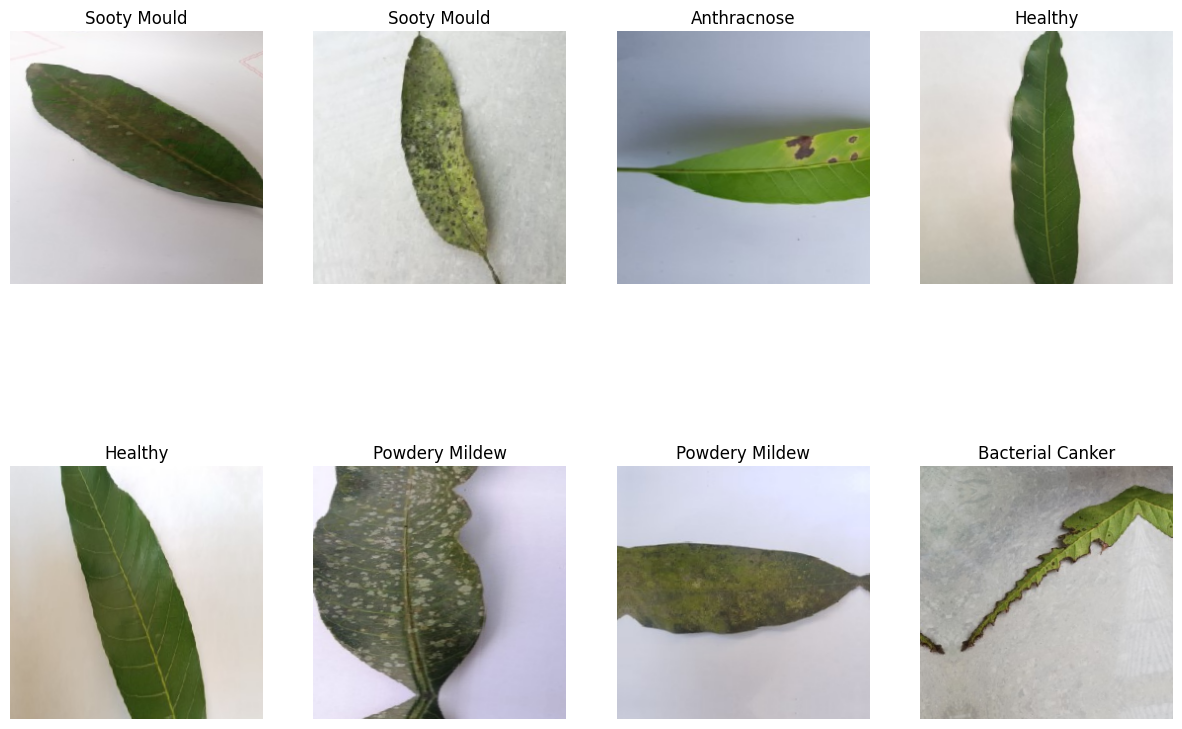

In [ ]:
plt.figure(figsize=(15,16))
for image_batch,label_batch in train_generator:
  for i in range(8):
    plt.subplot(3,4,i+1)
    plt.imshow((image_batch[i]*255).astype(np.uint8))
    plt.title(class_names[int(label_batch[i])])
    plt.axis('off')
  break


In [ ]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model =Sequential([ InputLayer(input_shape=input_shape),

Conv2D(32, (3,3),padding='same', activation='relu'), MaxPooling2D((2, 2)),

Conv2D(64, (3,3),padding='same', activation='relu'), MaxPooling2D((2, 2)),

Conv2D(128, (3,3),padding='same', activation='relu'), MaxPooling2D((2, 2)),

Conv2D(256, (3,3), padding='same',activation='relu'),
MaxPooling2D((2, 2)),

Conv2D(512, (3, 3),padding='same',activation='relu'),
MaxPooling2D((2, 2)),

Conv2D(1024, (3, 3),padding='same',activation='relu'),
MaxPooling2D((2, 2)), Dropout(0.5),

Conv2D(1024, (3, 3),padding='same',activation='relu'),
MaxPooling2D((2, 2)), Dropout(0.5),

Flatten(),

Dense(1024,activation='relu'), Dense(128,activation='relu'),
Dense(64,activation='relu'),
Dense(5,activation='softmax')
])

In [ ]:
model.summary()# summary of model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 128)       0

In [ ]:
opt = Adam(learning_rate=LR)



In [ ]:
model.compile( optimizer=opt,
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


In [ ]:
steps_per_epoch=int((train_generator.samples)/BATCH_SIZE)
validation_step=int((val_generator.samples)/BATCH_SIZE)
steps_per_epoch,validation_step

(271, 43)

In [ ]:
history=model.fit( train_generator,
                  verbose=1,
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE,
                  validation_data=val_generator,
                  steps_per_epoch=steps_per_epoch,
                  validation_steps=validation_step

)


In [ ]:
model.save('/content/drive/MyDrive/mango/my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Load the trained model
model_path = '/content/drive/MyDrive/best_model.h5'
model = load_model(model_path)

# Load and preprocess the sample image
sample_image_path = '/content/sample_data/20211109_121820 (Custom).jpg'  # Replace with the path to your sample image
img = image.load_img(sample_image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255

# Make prediction
prediction = model.predict(img_array)

# Get the predicted class
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]

print(f'The predicted class is: {predicted_class}')


1/1 [==============================] - 0s 331ms/step
The predicted class is: Powdery Mildew
